<a href="https://colab.research.google.com/github/ta1231/ML_Practice/blob/main/covid19_multistep_multivar_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import numpy as np
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SimpleRNN
from statsmodels.tsa.arima_process import arma_generate_sample
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
data = pd.read_csv("/content/covid_data_final.csv")

In [ ]:
data

,date,red,korea,koreagon,koreacon,korvac,denmark,dengon,dencon,denvac,uk,ukgon,ukcon,ukvac,us,usgon,uscon,usvac,is,isgon,iscon,isvac,turkey,turgon,turcon,turvac,brazil,bragon,bracon,bravac,kenya,kengon,kencon,kenvac,hungary,hungon,huncon,hunvac,mexico,mexgon,mexcon,mexvac,ethiopia,ethgon,ethcon,ethvac,thailand,thagon,thacon,thavac
0,2020-02-01,1,20.3,0,1,0,39.6,0,0,0,44.2,0,0,0,51.5,0,0,0,58.6,0,0,0,29.2,0,0,0,77,0,0,0,68,0,0,0,30.8,0,0,0,60,0,0,0,63.7,0,0,0,76.5,0,0,0
1,2020-02-02,1,24.6,0,3,0,36.1,0,0,0,43.1,0,0,0,44.0,1,0,0,56.3,0,0,0,26.4,0,0,0,74,0,0,0,68,0,0,0,32.5,0,0,0,58,0,0,0,62.6,0,0,0,76.6,0,0,0
2,2020-02-03,0,26.4,0,0,0,34.4,0,0,0,50.0,0,6,0,50.5,0,3,0,56.4,0,0,0,29.6,0,0,0,75,0,0,0,66,0,0,0,35.1,0,0,0,60,1,0,0,66.8,0,0,0,75.9,0,0,0
3,2020-02-04,0,23.0,0,1,0,41.2,0,0,0,49.1,0,0,0,51.5,0,0,0,57.3,0,0,0,32.8,0,0,0,76,0,0,0,66,0,0,0,32.1,0,0,0,61,0,0,0,65.8,0,0,0,77.8,0,6,0
4,2020-02-05,0,24.6,0,3,0,40.4,0,0,0,52.6,0,1,0,37.5,0,0,0,56.6,0,0,0,28.1,0,0,0,78,0,0,0,70,0,0,0,39.7,0,0,0,58,1,0,0,71.8,0,0,0,77.9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,2021-05-27,0,64.5,0,587,2068877,46.4,0,1125,1230270,59.1,0,3384,24478052,79.5,0,27454,132769894,72.6,0,12,5127431,61.9,0,8426,12228353,63,0,67467,21540640,72,0,341,203,62.3,0,803119,3445557,56,0,3050,12204779,65.0,0,347,0,88.1,0,5386,994161
482,2021-05-28,0,68.8,0,533,2133720,48.7,0,1003,1239973,59.6,0,4030,24914003,80.0,0,21858,133532544,72.3,0,13,5128654,62.2,0,7773,12277313,58,0,49768,21867556,72,0,344,203,56.5,0,803567,3539868,64,0,3006,12320589,63.2,1,417,0,89.9,0,3759,1088222
483,2021-05-29,1,71.6,0,479,2143293,48.4,0,1044,1245169,60.8,0,3241,25332851,81.5,0,11999,134418748,72.1,0,20,5128812,64.7,0,7656,12303813,62,0,79670,21977631,72,0,444,203,55.2,0,804032,3582547,66,0,2725,12320589,68.3,0,256,0,90.0,0,4803,1094523
484,2021-05-30,1,66.1,0,430,2143385,54.4,0,958,1252120,55.0,0,3114,25539173,78.5,0,6733,135087319,75.5,0,5,5130649,68.0,0,6933,12409186,60,0,43520,22008112,72,0,162,203,60.9,0,804382,3611690,63,0,1307,12390240,68.3,0,145,0,90.9,0,4528,1110953


In [ ]:
red = np.array(data['red'])
kortem = np.array(data['korea'])
dentem = np.array(data['denmark'])
uktem = np.array(data['uk'])
ustem = np.array(data['us'])
istem = np.array(data['is'])
turtem = np.array(data['turkey'])
ethtem = np.array(data['ethiopia'])
kentem = np.array(data['kenya'])
thatem = np.array(data['thailand'])
mextem = np.array(data['mexico'])
huntem = np.array(data['hungary'])
bratem = np.array(data['brazil'])




korgon = np.array(data['koreagon'][:])
dengon = np.array(data['dengon'][:])
ukgon = np.array(data['ukgon'][:])
usgon = np.array(data['usgon'][:])
isgon = np.array(data['isgon'][:])
turgon = np.array(data['turgon'][:])
ethgon = np.array(data['ethgon'])
kengon = np.array(data['kengon'])
thagon = np.array(data['thagon'])
mexgon = np.array(data['mexgon'])
hungon = np.array(data['hungon'])
bragon = np.array(data['bragon'])

korcon = np.array(data['koreacon'][:])
dencon = np.array(data['dencon'][:])
ukcon = np.array(data['ukcon'][:])
uscon = np.array(data['uscon'][:])
iscon = np.array(data['iscon'][:])
turcon = np.array(data['turcon'][:])
ethcon = np.array(data['ethcon'])
kencon = np.array(data['kencon'])
thacon = np.array(data['thacon'])
mexcon = np.array(data['mexcon'])
huncon = np.array(data['huncon'])
bracon = np.array(data['bracon'])

korvac = np.array(data['korvac'][:])
denvac = np.array(data['denvac'][:])
ukvac = np.array(data['ukvac'][:])
usvac = np.array(data['usvac'][:])
isvac = np.array(data['isvac'][:])
turvac = np.array(data['turvac'][:])
ethvac = np.array(data['ethvac'])
kenvac = np.array(data['kenvac'])
thavac = np.array(data['thavac'])
mexvac = np.array(data['mexvac'])
hunvac = np.array(data['hunvac'])
bravac = np.array(data['bravac'])

한국
51269183
덴마크
5792203
영국
67886004
미국
331002647
이스라엘
8655541
터키
84339067
케냐
532771300
에티오피아
114963583
태국
69799978
멕시코
128932753
헝가리
9660350
브라질
212559409

In [ ]:
maxValue = np.max(korcon)
minValue = np.min(korcon)
korcon = (korcon - minValue) / (maxValue - minValue)

maxValue = np.max(kortem)
minValue = np.min(kortem)
kortem = (kortem - minValue) / (maxValue - minValue)

maxValue = 51269183
minValue = np.min(korvac)
korvac = (korvac - minValue) / (maxValue - minValue)

maxValue = np.max(dencon)
minValue = np.min(dencon)
dencon = (dencon - minValue) / (maxValue - minValue)

maxValue = np.max(dentem)
minValue = np.min(dentem)
dentem = (dentem - minValue) / (maxValue - minValue)

maxValue = 5792203
minValue = np.min(denvac)
denvac = (denvac - minValue) / (maxValue - minValue)

maxValue = np.max(ukcon)
minValue = np.min(ukcon)
ukcon = (ukcon - minValue) / (maxValue - minValue)

maxValue = np.max(uktem)
minValue = np.min(uktem)
uktem = (uktem - minValue) / (maxValue - minValue)

maxValue = 67886004
minValue = np.min(ukvac)
ukvac = (ukvac - minValue) / (maxValue - minValue)

maxValue = np.max(uscon)
minValue = np.min(uscon)
uscon = (uscon - minValue) / (maxValue - minValue)

maxValue = np.max(ustem)
minValue = np.min(ustem)
ustem = (ustem - minValue) / (maxValue - minValue)

maxValue = 331002647
minValue = np.min(usvac)
usvac = (usvac - minValue) / (maxValue - minValue)

maxValue = np.max(iscon)
minValue = np.min(iscon)
iscon = (iscon - minValue) / (maxValue - minValue)

maxValue = np.max(istem)
minValue = np.min(istem)
istem = (istem - minValue) / (maxValue - minValue)


maxValue = 8655541
minValue = np.min(isvac)
isvac = (isvac - minValue) / (maxValue - minValue)

maxValue = np.max(turcon)
minValue = np.min(turcon)
turcon = (turcon - minValue) / (maxValue - minValue)

maxValue = np.max(turtem)
minValue = np.min(turtem)
turtem = (turtem - minValue) / (maxValue - minValue)

maxValue = 84339067
minValue = np.min(turvac)
turvac = (turvac - minValue) / (maxValue - minValue)

maxValue = np.max(kencon)
minValue = np.min(kencon)
kencon = (kencon - minValue) / (maxValue - minValue)

maxValue = np.max(kentem)
minValue = np.min(kentem)
kentem = (kentem - minValue) / (maxValue - minValue)

maxValue = 53277130
minValue = np.min(kenvac)
kenvac = (kenvac - minValue) / (maxValue - minValue)

maxValue = np.max(ethcon)
minValue = np.min(ethcon)
ethcon = (ethcon - minValue) / (maxValue - minValue)

maxValue = np.max(ethtem)
minValue = np.min(ethtem)
ethtem = (ethtem - minValue) / (maxValue - minValue)

maxValue = 114963583
minValue = np.min(ethvac)
ethvac = (ethvac - minValue) / (maxValue - minValue)

maxValue = np.max(thacon)
minValue = np.min(thacon)
thacon = (thacon - minValue) / (maxValue - minValue)

maxValue = np.max(thatem)
minValue = np.min(thatem)
thatem = (thatem - minValue) / (maxValue - minValue)

maxValue = 69799978
minValue = np.min(thavac)
thavac = (thavac - minValue) / (maxValue - minValue)

maxValue = np.max(mexcon)
minValue = np.min(mexcon)
mexcon = (mexcon - minValue) / (maxValue - minValue)

maxValue = np.max(mextem)
minValue = np.min(mextem)
mextem = (mextem - minValue) / (maxValue - minValue)

maxValue = 128932753
minValue = np.min(mexvac)
mexvac = (mexvac - minValue) / (maxValue - minValue)

maxValue = np.max(bracon)
minValue = np.min(bracon)
bracon = (bracon - minValue) / (maxValue - minValue)

maxValue = np.max(bratem)
minValue = np.min(bratem)
bratem = (bratem - minValue) / (maxValue - minValue)

maxValue = 212559409
minValue = np.min(bravac)
bravac = (bravac - minValue) / (maxValue - minValue)


In [ ]:
kordata = []
for i in range(len(korcon)):
  c = [korcon[i], korvac[i], kortem[i], korgon[i], red[i]]
  kordata.append(c)

In [ ]:
dendata = []
for i in range(len(dencon)):
  c = [dencon[i], denvac[i], dentem[i], dengon[i], red[i]]
  dendata.append(c)

ukdata = []
for i in range(len(dencon)):
  c = [ukcon[i], ukvac[i], uktem[i], ukgon[i], red[i]]
  ukdata.append(c)

usdata = []
for i in range(len(dencon)):
  c = [uscon[i], usvac[i], ustem[i], usgon[i], red[i]]
  usdata.append(c)

isdata = []
for i in range(len(dencon)):
  c = [iscon[i], isvac[i], istem[i], isgon[i], red[i]]
  isdata.append(c)

turdata = []
for i in range(len(dencon)):
  c = [turcon[i], turvac[i], turtem[i], turgon[i], red[i]]
  turdata.append(c)

kendata = []
for i in range(len(kencon)):
  c = [kencon[i], kenvac[i], kentem[i], kengon[i], red[i]]
  kendata.append(c)
  
ethdata = []
for i in range(len(ethcon)):
  c = [ethcon[i], ethvac[i], ethtem[i], ethgon[i], red[i]]
  ethdata.append(c)

thadata = []
for i in range(len(thacon)):
  c = [thacon[i], thavac[i], thatem[i], thagon[i], red[i]]
  thadata.append(c)

mexdata = []
for i in range(len(mexcon)):
  c = [mexcon[i], mexvac[i], mextem[i], mexgon[i], red[i]]
  mexdata.append(c)

hundata = []
for i in range(len(huncon)):
  c = [huncon[i], hunvac[i], huntem[i], hungon[i], red[i]]
  hundata.append(c)

bradata = []
for i in range(len(bracon)):
  c = [bracon[i], bravac[i], bratem[i], bragon[i], red[i]]
  bradata.append(c)

In [ ]:
kordata = np.array(kordata)
dendata = np.array(dendata)
ukdata = np.array(ukdata)
usdata = np.array(usdata)
isdata = np.array(isdata)
turdata = np.array(turdata)

kendata = np.array(kendata)
ethdata = np.array(ethdata)
thadata = np.array(thadata)
mexdata = np.array(mexdata)
hundata = np.array(hundata)
bradata = np.array(bradata)

In [ ]:
kordata[:5]

array([[8.08407437e-04, 0.00000000e+00, 8.43023256e-02, 0.00000000e+00,
        1.00000000e+00],
       [2.42522231e-03, 0.00000000e+00, 1.46802326e-01, 0.00000000e+00,
        1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.72965116e-01, 0.00000000e+00,
        0.00000000e+00],
       [8.08407437e-04, 0.00000000e+00, 1.23546512e-01, 0.00000000e+00,
        0.00000000e+00],
       [2.42522231e-03, 0.00000000e+00, 1.46802326e-01, 0.00000000e+00,
        0.00000000e+00]])

In [ ]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=50, min_delta = 0.000001)
nb_epoch=300; batch_size1=50; learning_rate=0.0005
window_size = 7 # 데이터셋 생성

In [ ]:
def create_dataset(signal_data, window_size=7):
    dataX, dataY = [], []
    for i in range(len(signal_data)-window_size):
        dataX.append(signal_data[i:(i+window_size)])
        dataY.append(signal_data[i + window_size][0])
    return np.array(dataX)[:-50], np.array(dataY)[:-50], np.array(dataX)[-50:], np.array(dataY)[-50:]

def create_dataset_all(signal_data, window_size=7):
    dataX, dataY = [], []
    for i in range(len(signal_data)-window_size):
        dataX.append(signal_data[i:(i+window_size)])
        dataY.append(signal_data[i + window_size][0])
    return np.array(dataX), np.array(dataY)

def create_dataset_us(signal_data, window_size=7):
    dataX, dataY = [], []
    for i in range(len(signal_data)-window_size):
        dataX.append(signal_data[i:(i+window_size)])
        dataY.append(signal_data[i + window_size][0])
    return np.array(dataX)[:300], np.array(dataY)[:300], np.array(dataX)[300:], np.array(dataY)[300:]

In [ ]:
kortrainx, kortrainy, kortestx, kortesty = create_dataset(kordata, 7)
korx, kory = create_dataset_all(kordata, 7)
# denx, deny = create_dataset(dendata, 7)
# ukx, uky = create_dataset(ukdata, 7)
# usx, usy = create_dataset(usdata, 7)
# isx, isy = create_dataset(isdata, 7)
# turx, tury = create_dataset(turdata, 7)
ustrainx, ustrainy, ustestx, ustesty = create_dataset(usdata, 7)
usx, usy = create_dataset_all(usdata, 7)

ustrainx2, ustrainy2, ustestx2, ustesty2= create_dataset_us(usdata, 7)

istrainx, istrainy, istestx, istesty = create_dataset(isdata, 7)
isx, isy = create_dataset_all(isdata, 7)

uktrainx, uktrainy, uktestx, uktesty = create_dataset(ukdata, 7)
ukx, uky = create_dataset_all(ukdata, 7)

dentrainx, dentrainy, dentestx, dentesty = create_dataset(dendata, 7)
denx, deny = create_dataset_all(dendata, 7)

turtrainx, turtrainy, turtestx, turtesty = create_dataset(turdata, 7)
turx, tury = create_dataset_all(turdata, 7)

hunx, huny = create_dataset_all(turdata, 7)

ethx, ethy = create_dataset_all(ethdata, 7)


kenx, keny = create_dataset_all(kendata, 7)


brax, bray = create_dataset_all(bradata, 7)


thax, thay = create_dataset_all(thadata, 7)

mexx, mexy = create_dataset_all(mexdata, 7)



In [ ]:
model2 = Sequential()

model2.add(LSTM(6, input_shape=(kortrainx.shape[1], kortrainx.shape[2]), return_sequences = False))
model2.add(Dense(6))
#model2.add(Dense(4))
model2.add(Dense(1))
print(model2.summary())
model2.compile(loss='mean_squared_error', optimizer='adam')

hist2=model2.fit(kortrainx, kortrainy, epochs=300, batch_size=batch_size1, verbose=1, shuffle=False, callbacks=[es], validation_data = (kortestx, kortesty))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6)                 288       
_________________________________________________________________
dense (Dense)                (None, 6)                 42        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
9/9 [==============================] - 18s 100ms/step - loss: 0.0602 - val_loss: 0.0671
Epoch 2/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0441 - val_loss: 0.0757
Epoch 3/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0405 - val_loss: 0.0759
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0391 - val_loss:

In [ ]:
model2_pred = model2.predict(kortestx)
model2.reset_states()

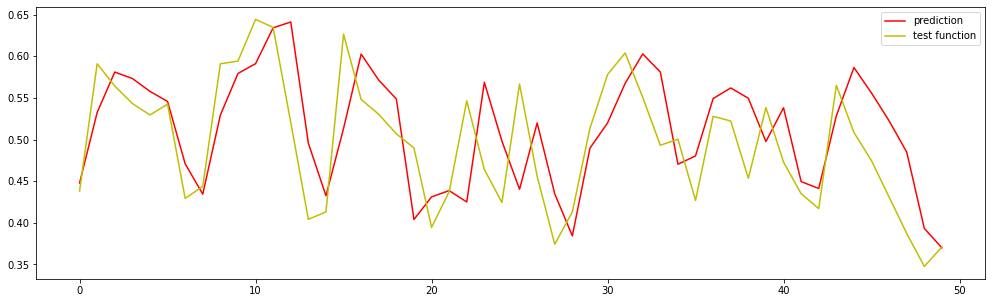

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model2_pred[:],'r',label="prediction")
plt.plot(kortesty[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
kordata = korx

In [ ]:
model2_pred = model2.predict(kordata)
model2.reset_states()

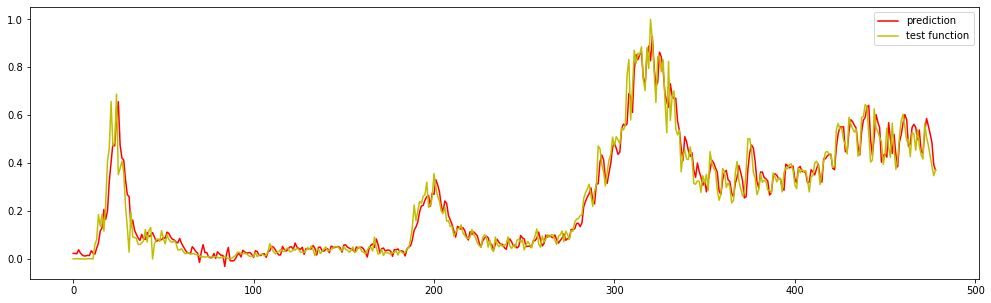

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model2_pred[:],'r',label="prediction")
plt.plot(kory[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
# for i in range(70):
#   lst = []
#   for j in range(7):
#     lst.append([model2_pred[-7:].reshape(7)[j], korvac[400+i + j], kortem[400+i + j], korgon[400+i+j], red[400+i+j]])
#   lst = np.array([lst])
#   nxt = np.array([model2.predict(lst)[0]])
#   model2_pred = np.concatenate((model2_pred, nxt))

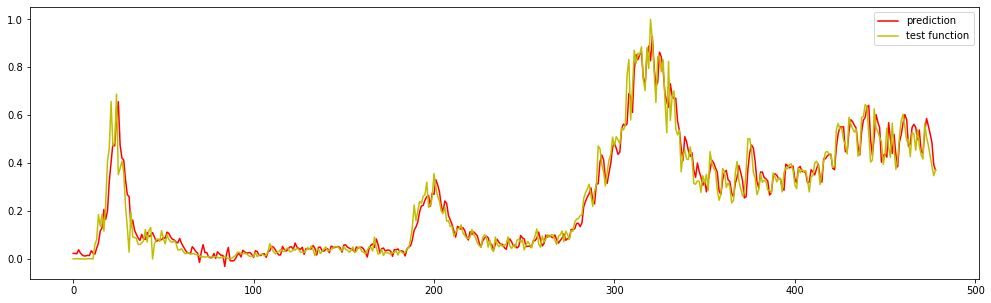

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model2_pred[:],'r',label="prediction")
plt.plot(kory[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
model3 = Sequential()
model3.add(SimpleRNN(window_size, input_shape = (kortrainx.shape[1], kortrainx.shape[2])))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
hist3=model3.fit(kortrainx, kortrainy, epochs=nb_epoch, batch_size=batch_size1, verbose=1, shuffle=False, callbacks=[es], validation_data = (kortestx, kortesty))

Epoch 1/300
9/9 [==============================] - 2s 57ms/step - loss: 0.6061 - val_loss: 0.8538
Epoch 2/300
9/9 [==============================] - 0s 4ms/step - loss: 0.5155 - val_loss: 0.7453
Epoch 3/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4373 - val_loss: 0.6482
Epoch 4/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3700 - val_loss: 0.5622
Epoch 5/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3124 - val_loss: 0.4866
Epoch 6/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2637 - val_loss: 0.4206
Epoch 7/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2228 - val_loss: 0.3634
Epoch 8/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1886 - val_loss: 0.3141
Epoch 9/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1603 - val_loss: 0.2718
Epoch 10/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1370 - val_loss: 0.2359
Epoch 11/300
9/9 [==========

In [ ]:
model3_pred = model3.predict(kortestx)
model3.reset_states()

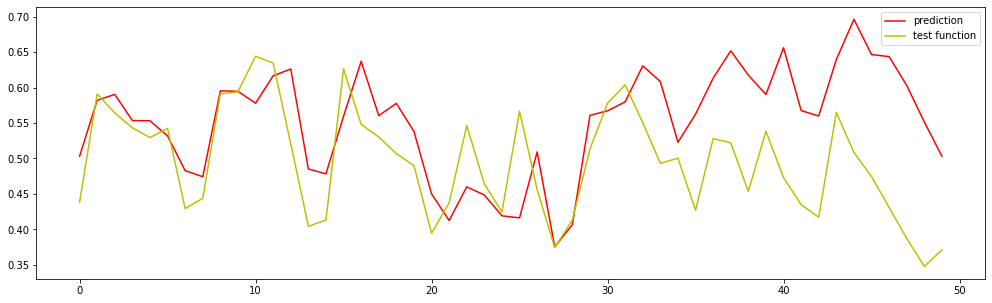

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model3_pred[:],'r',label="prediction")
plt.plot(kortesty[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
model3_pred_all = model3.predict(korx)
model3.reset_states()

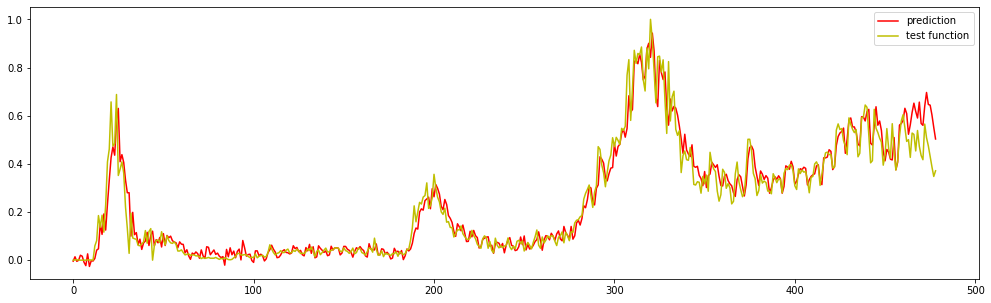

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model3_pred_all[:],'r',label="prediction")
plt.plot(kory[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
def create_dataset2(signal_data, vac, tem, gon, red, window_size):
    dataX, dataY = [], []
    for i in range(len(signal_data)-window_size):
        temp=np.array([signal_data[i:(i+window_size)],vac[i:(i+window_size)], tem[i:(i+window_size)], gon[i:(i+window_size)], red[i:(i+window_size)]]).reshape(-1)
        dataX.append(list(temp))
        dataY.append(signal_data[i + window_size])
    return np.array(dataX), np.array(dataY)

In [ ]:
x_train, y_train = create_dataset2(korcon[:-50],korvac[:-50], kortem[:-50], korgon[:-50], red[:-50], 7)
x_test, y_test = create_dataset2(korcon[-50:],korvac[-50:], kortem[-50:], korgon[-50:], red[-50:], 7)

In [ ]:
model4 = Sequential()
model4.add(Dense(32, input_dim = window_size*5, activation = 'relu'))
model4.add(Dense(16, activation = 'relu'))
model4.add(Dense(8, activation = 'relu'))
model4.add(Dense(4, activation = 'relu'))
model4.add(Dense(1))
model4.compile(optimizer = optimizers.Adam(lr =learning_rate), loss = 'mean_squared_error')

hist4=model4.fit(x_train, y_train, epochs=100, batch_size=batch_size1, verbose=1, shuffle=False, callbacks=[es], validation_data = (x_test, y_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
9/9 [==============================] - 1s 35ms/step - loss: 0.0305 - val_loss: 0.1364
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0256 - val_loss: 0.1015
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0217 - val_loss: 0.0721
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0194 - val_loss: 0.0551
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0186 - val_loss: 0.0432
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0181 - val_loss: 0.0353
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0173 - val_loss: 0.0301
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0161 - val_loss: 0.0264
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0149 - val_loss: 0.0235
Epoch 10/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0137 - val_loss: 0.0210
Epoch 11/100
9/9 [==========

In [ ]:
model4_pred_all = model4.predict(x_test)

In [ ]:
model3.evaluate(kortestx, kortesty)

2/2 [==============================] - 0s 7ms/step - loss: 0.0096


0.009646031074225903

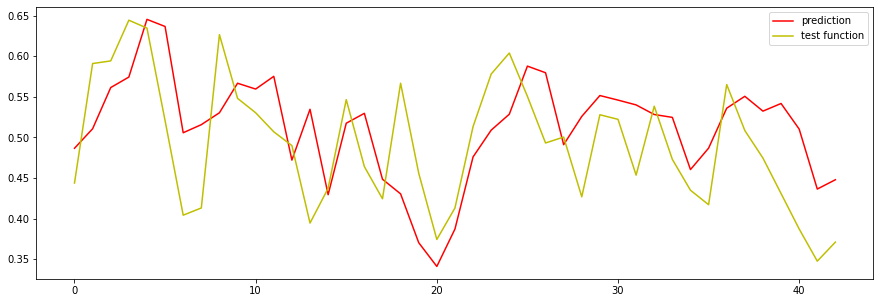

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(model4_pred_all[:],'r',label="prediction")
plt.plot(y_test[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
model4_pred = model4.predict(np.concatenate((x_train,x_test)))


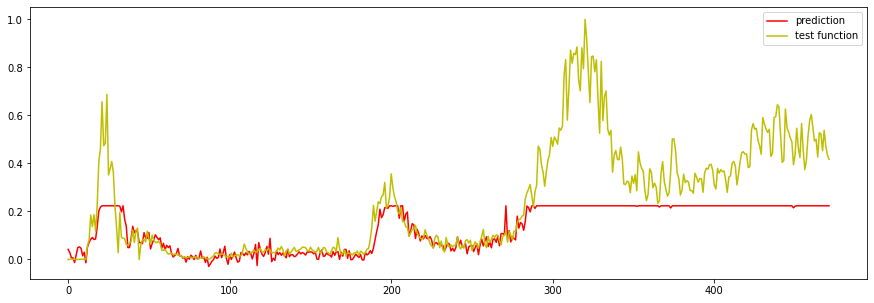

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(model4_pred[:],'r',label="prediction")
plt.plot(kory[:-7], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
model5 = Sequential()

model5.add(LSTM(6, input_shape=(ustrainx.shape[1], ustrainx.shape[2]), return_sequences = False))
model5.add(Dense(6))
#model2.add(Dense(4))
model5.add(Dense(1))
print(model5.summary())
model5.compile(loss='mean_squared_error', optimizer='adam')

hist5=model5.fit(ustrainx, ustrainy, epochs=300, batch_size=batch_size1, verbose=1, shuffle=False, callbacks=[es], validation_data = (ustestx, ustesty))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6)                 288       
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
9/9 [==============================] - 3s 74ms/step - loss: 0.3140 - val_loss: 0.3947
Epoch 2/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2093 - val_loss: 0.2766
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1417 - val_loss: 0.1951
Epoch 4/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0981 - val_loss:

In [ ]:
model5_pred = model5.predict(korx)
model5.reset_states()

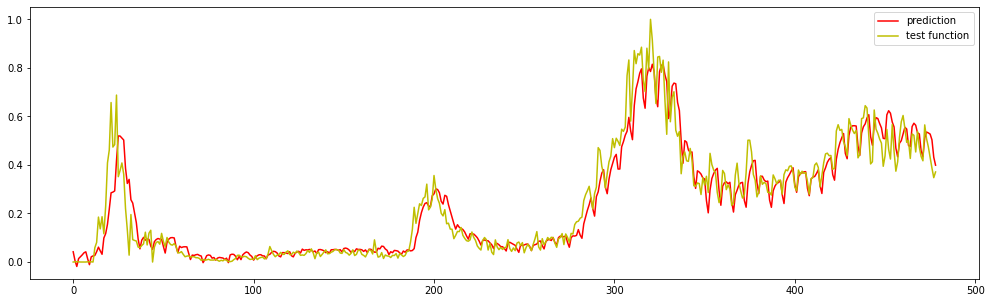

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model5_pred[:],'r',label="prediction")
plt.plot(kory[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
model5_pred_all = model5.predict(kortestx)
model5.reset_states()

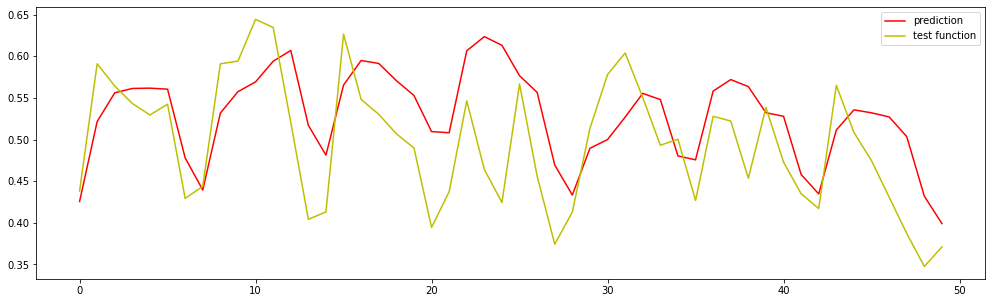

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model5_pred_all[:],'r',label="prediction")
plt.plot(kortesty[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
model2.evaluate(kortestx, kortesty)

2/2 [==============================] - 1s 8ms/step - loss: 0.0038


0.003849908011034131

In [ ]:
model5.evaluate(kortestx, kortesty)

2/2 [==============================] - 1s 7ms/step - loss: 0.0048


0.0048363362438976765

In [ ]:
model6 = Sequential()

model6.add(LSTM(6, input_shape=(istrainx.shape[1], istrainx.shape[2]), return_sequences = False))
model6.add(Dense(6))
#model2.add(Dense(4))
model6.add(Dense(1))
print(model6.summary())
model6.compile(loss='mean_squared_error', optimizer='adam')

hist6=model6.fit(istrainx, istrainy, epochs=300, batch_size=batch_size1, verbose=1, shuffle=False, callbacks=[es], validation_data = (istestx, istesty))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 6)                 288       
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
9/9 [==============================] - 2s 71ms/step - loss: 0.0776 - val_loss: 0.0269
Epoch 2/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0380 - val_loss: 0.0053
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0201 - val_loss: 0.0013
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0164 - val_loss:

In [ ]:
model6_pred = model6.predict(korx)
model6.reset_states()

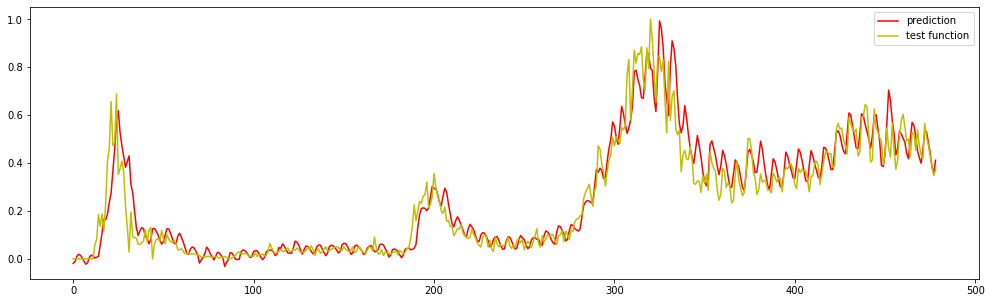

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model6_pred[:],'r',label="prediction")
plt.plot(kory[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
model6.evaluate(kortestx, kortesty)

2/2 [==============================] - 1s 6ms/step - loss: 0.0050


0.004988840315490961

In [ ]:
model6_pred_test = model6.predict(kortestx)
model6.reset_states()

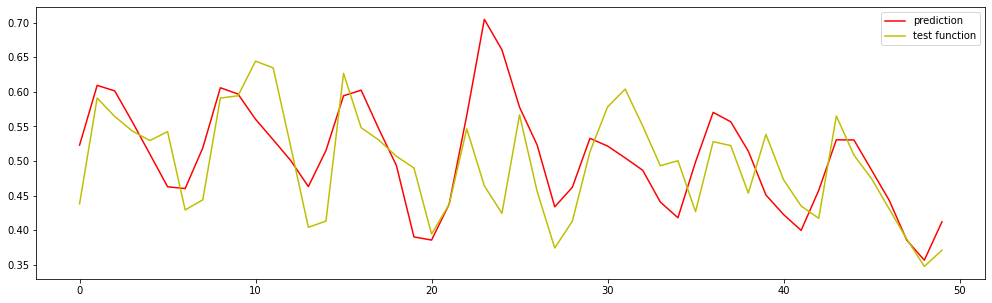

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model6_pred_test[:],'r',label="prediction")
plt.plot(kortesty[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
model7 = Sequential()

model7.add(LSTM(6, input_shape=(ukx.shape[1], ukx.shape[2]), return_sequences = False))
model7.add(Dense(6))
#model2.add(Dense(4))
model7.add(Dense(1))
print(model7.summary())
model7.compile(loss='mean_squared_error', optimizer='adam')

hist7=model7.fit(ukx, uky, epochs=300, batch_size=batch_size1, verbose=1, shuffle=False, callbacks=[es], validation_data = (uktestx, uktesty))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 6)                 288       
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 7         
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
10/10 [==============================] - 3s 64ms/step - loss: 0.0460 - val_loss: 0.0034
Epoch 2/300
10/10 [==============================] - 0s 6ms/step - loss: 0.0316 - val_loss: 4.4644e-04
Epoch 3/300
10/10 [==============================] - 0s 6ms/step - loss: 0.0247 - val_loss: 5.0479e-04
Epoch 4/300
10/10 [==============================] - 0s 6ms/step - loss: 0.

In [ ]:
model7.evaluate(kortestx, kortesty)

2/2 [==============================] - 1s 5ms/step - loss: 0.0070


0.007010364439338446

In [ ]:
model7_pred = model7.predict(kortestx)
model7.reset_states()

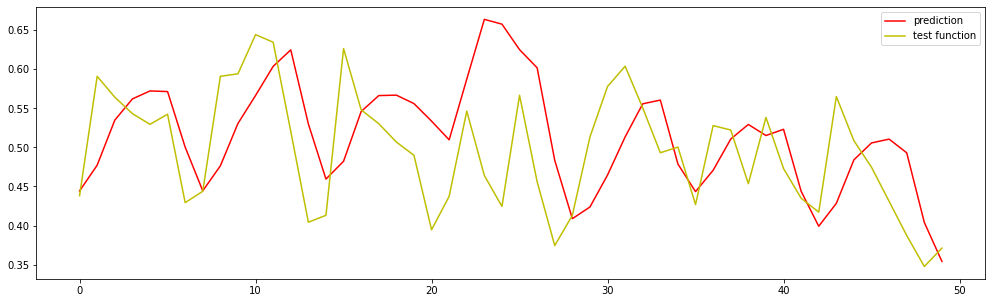

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model7_pred[:],'r',label="prediction")
plt.plot(kortesty[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
arrx = np.concatenate((ukx, ustrainx, istrainx))
arry = np.concatenate((uky, ustrainy, istrainy))

model8 = Sequential()

model8.add(LSTM(6, input_shape=(arrx.shape[1], arrx.shape[2]), return_sequences = False))
model8.add(Dense(6))
#model2.add(Dense(4))
model8.add(Dense(1))
print(model8.summary())
model8.compile(loss='mean_squared_error', optimizer='adam')

hist8=model8.fit(arrx, arry, epochs=300, batch_size=batch_size1, verbose=1, shuffle=True, callbacks=[es], validation_data = (arrx, arry))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 6)                 288       
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 7         
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
27/27 [==============================] - 3s 30ms/step - loss: 0.0459 - val_loss: 0.0300
Epoch 2/300
27/27 [==============================] - 0s 7ms/step - loss: 0.0285 - val_loss: 0.0211
Epoch 3/300
27/27 [==============================] - 0s 6ms/step - loss: 0.0191 - val_loss: 0.0138
Epoch 4/300
27/27 [==============================] - 0s 7ms/step - loss: 0.0125 - v

In [ ]:
model8.evaluate(kortestx, kortesty)

2/2 [==============================] - 0s 6ms/step - loss: 0.0036


0.0035994350910186768

In [ ]:
model8_pred = model8.predict(kortestx)
model8.reset_states()

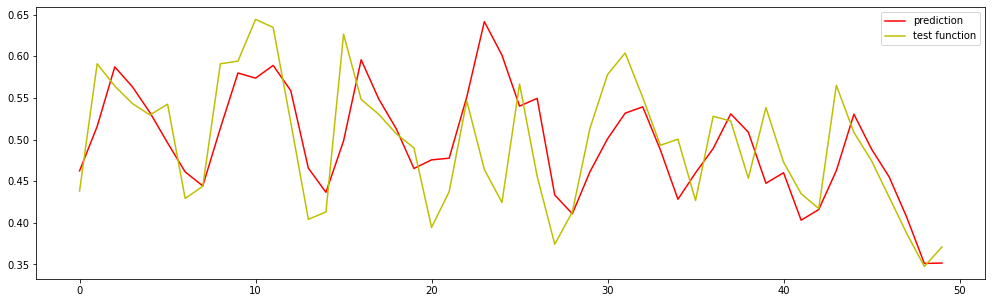

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model8_pred[:],'r',label="prediction")
plt.plot(kortesty[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
model8_pred_all = model8.predict(korx)
model8.reset_states()

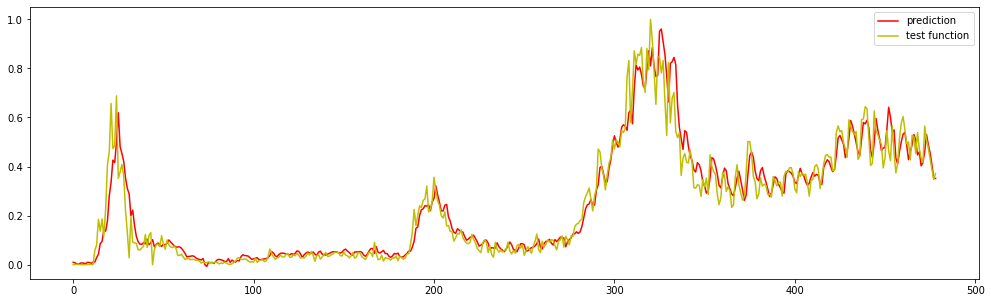

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model8_pred_all[:],'r',label="prediction")
plt.plot(kory[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
arrx = np.concatenate((kortrainx, ukx, ustrainx, istrainx))
arry = np.concatenate((kortrainy, uky, ustrainy, istrainy))

model9 = Sequential()

model9.add(LSTM(6, input_shape=(arrx.shape[1], arrx.shape[2]), return_sequences = False))
model9.add(Dense(6))
#model2.add(Dense(4))
model9.add(Dense(1))
print(model9.summary())
model9.compile(loss='mean_squared_error', optimizer='adam')

hist9=model9.fit(arrx, arry, epochs=300, batch_size=batch_size1, verbose=1, shuffle=True, callbacks=[es], validation_data = (arrx, arry))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6)                 288       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
36/36 [==============================] - 3s 23ms/step - loss: 0.0686 - val_loss: 0.0353
Epoch 2/300
36/36 [==============================] - 0s 6ms/step - loss: 0.0330 - val_loss: 0.0216
Epoch 3/300
36/36 [==============================] - 0s 6ms/step - loss: 0.0201 - val_loss: 0.0135
Epoch 4/300
36/36 [==============================] - 0s 6ms/step - loss: 0.0129 - v

In [ ]:
model9.evaluate(kortestx, kortesty)

2/2 [==============================] - 0s 5ms/step - loss: 0.0036


0.0036092866212129593

In [ ]:
model9_pred = model9.predict(kortestx)
model9.reset_states()

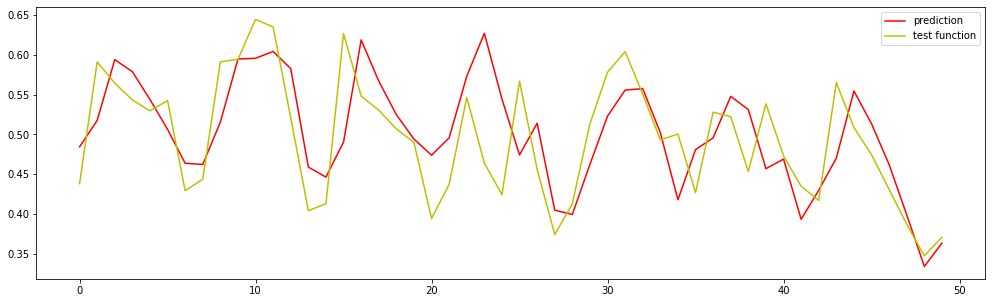

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model9_pred[:],'r',label="prediction")
plt.plot(kortesty[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
model9_pred_all = model9.predict(korx)
model9.reset_states()

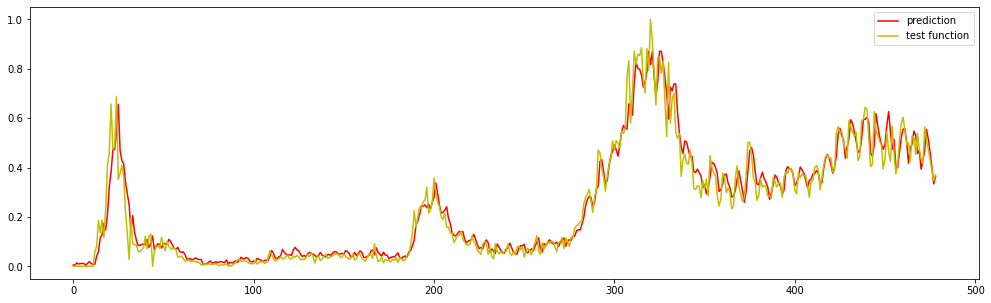

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model9_pred_all[:],'r',label="prediction")
plt.plot(kory[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
arrx = np.concatenate((kortrainx, ukx, ustrainx, istrainx))
arry = np.concatenate((kortrainy, uky, ustrainy, istrainy))


model10 = Sequential()
model10.add(SimpleRNN(window_size, input_shape = (arrx.shape[1], arrx.shape[2])))
model10.add(Dense(1))
model10.compile(loss='mean_squared_error', optimizer='adam')
hist10=model10.fit(arrx, arry, epochs=nb_epoch, batch_size=batch_size1, verbose=1, shuffle=True, callbacks=[es], validation_data = (arrx, arry))

Epoch 1/300
36/36 [==============================] - 2s 17ms/step - loss: 0.6615 - val_loss: 0.2222
Epoch 2/300
36/36 [==============================] - 0s 5ms/step - loss: 0.1939 - val_loss: 0.1198
Epoch 3/300
36/36 [==============================] - 0s 5ms/step - loss: 0.1012 - val_loss: 0.0708
Epoch 4/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0616 - val_loss: 0.0439
Epoch 5/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0400 - val_loss: 0.0300
Epoch 6/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0268 - val_loss: 0.0220
Epoch 7/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0212 - val_loss: 0.0174
Epoch 8/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0172 - val_loss: 0.0146
Epoch 9/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0146 - val_loss: 0.0128
Epoch 10/300
36/36 [==============================] - 0s 5ms/step - loss: 0.0118 - val_loss: 0.0115
Epoch 11

In [ ]:
model10.evaluate(kortestx, kortesty)

2/2 [==============================] - 0s 6ms/step - loss: 0.0032


0.0031649277079850435

In [ ]:
model10_pred = model10.predict(kortestx)
model10.reset_states()

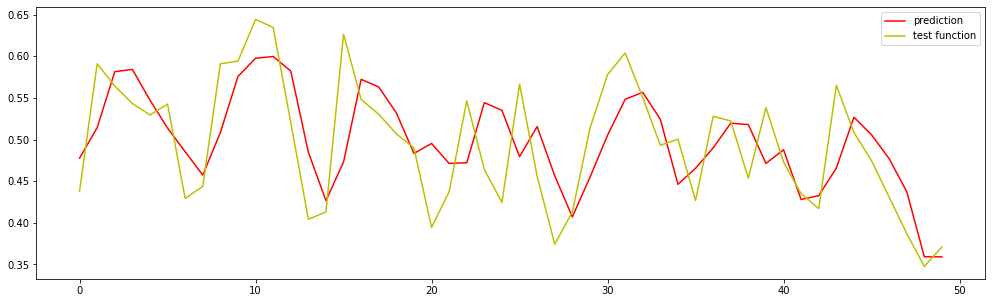

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model10_pred[:],'r',label="prediction")
plt.plot(kortesty[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
model10_pred_all= model10.predict(korx)
model10.reset_states()

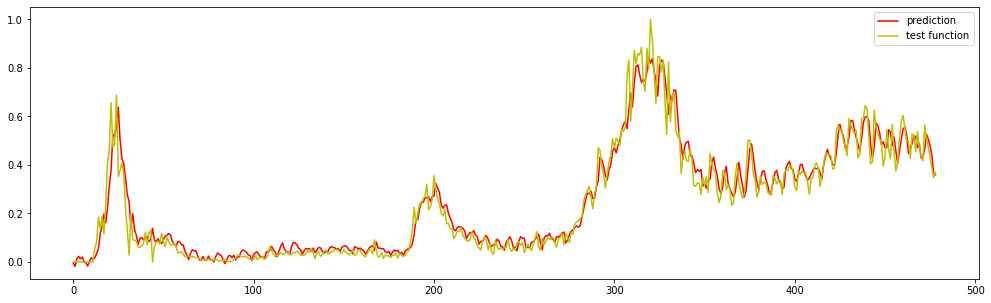

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model10_pred_all[:],'r',label="prediction")
plt.plot(kory[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
arrx = np.concatenate((kortrainx, ukx, ustrainx, istrainx, denx, turx, kenx, ethx, thax, mexx, hunx, brax))
arry = np.concatenate((kortrainy, uky, ustrainy, istrainy, deny, tury, keny, ethy, thay, mexy, huny, bray))

model11 = Sequential()

model11.add(LSTM(6, input_shape=(arrx.shape[1], arrx.shape[2]), return_sequences = False))
model11.add(Dense(6))
#model2.add(Dense(4))
model11.add(Dense(1))
print(model11.summary())
model11.compile(loss='mean_squared_error', optimizer='adam')

hist11=model11.fit(arrx, arry, epochs=300, batch_size=batch_size1, verbose=1, shuffle=True, callbacks=[es], validation_data = (arrx, arry))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 6)                 288       
_________________________________________________________________
dense_19 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 7         
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
112/112 [==============================] - 3s 12ms/step - loss: 0.0313 - val_loss: 0.0063
Epoch 2/300
112/112 [==============================] - 1s 7ms/step - loss: 0.0061 - val_loss: 0.0051
Epoch 3/300
112/112 [==============================] - 1s 7ms/step - loss: 0.0054 - val_loss: 0.0053
Epoch 4/300
112/112 [==============================] - 1s 7ms/step - loss: 0.

In [ ]:
model11.evaluate(kortestx, kortesty)

2/2 [==============================] - 0s 6ms/step - loss: 0.0048


0.00482858344912529

In [ ]:
model11_pred = model11.predict(kortestx)
model11.reset_states()

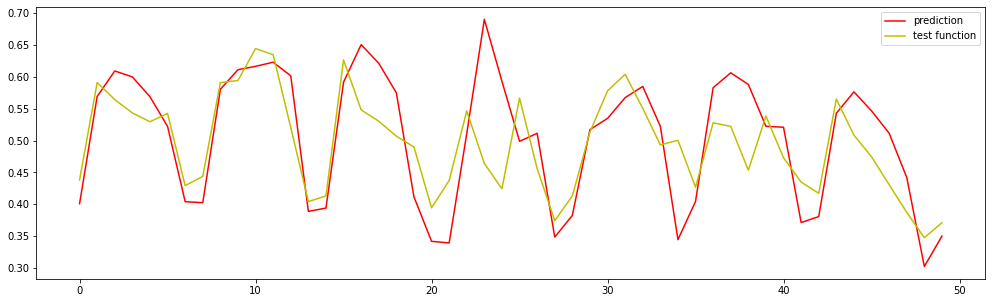

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model11_pred[:],'r',label="prediction")
plt.plot(kortesty[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
model11_pred_all= model11.predict(korx)
model11.reset_states()

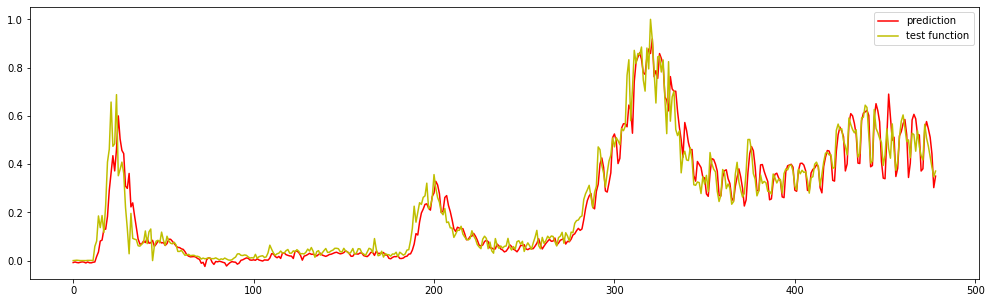

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model11_pred_all[:],'r',label="prediction")
plt.plot(kory[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
arrx = np.concatenate((kortrainx, ukx, ustrainx, istrainx))
arry = np.concatenate((kortrainy, uky, ustrainy, istrainy))


model12 = Sequential()
model12.add(SimpleRNN(window_size, input_shape = (arrx.shape[1], arrx.shape[2])))
model12.add(Dense(1))
model12.compile(loss='mean_squared_error', optimizer='adam')
hist12=model12.fit(arrx, arry, epochs=nb_epoch, batch_size=batch_size1, verbose=1, shuffle=False, callbacks=[es], validation_data = (arrx, arry))

Epoch 1/300
36/36 [==============================] - 2s 18ms/step - loss: 0.2074 - val_loss: 0.1001
Epoch 2/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0939 - val_loss: 0.0684
Epoch 3/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0643 - val_loss: 0.0497
Epoch 4/300
36/36 [==============================] - 0s 5ms/step - loss: 0.0466 - val_loss: 0.0377
Epoch 5/300
36/36 [==============================] - 0s 5ms/step - loss: 0.0353 - val_loss: 0.0297
Epoch 6/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0277 - val_loss: 0.0242
Epoch 7/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0225 - val_loss: 0.0202
Epoch 8/300
36/36 [==============================] - 0s 5ms/step - loss: 0.0187 - val_loss: 0.0173
Epoch 9/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0160 - val_loss: 0.0150
Epoch 10/300
36/36 [==============================] - 0s 5ms/step - loss: 0.0139 - val_loss: 0.0133
Epoch 11

In [ ]:
model12.evaluate(kortestx, kortesty)

2/2 [==============================] - 0s 9ms/step - loss: 0.0029


0.002924887929111719

In [ ]:
model9_pred_all = model9.predict(np.concatenate((kortrainx, kortestx)))
model9.reset_states()

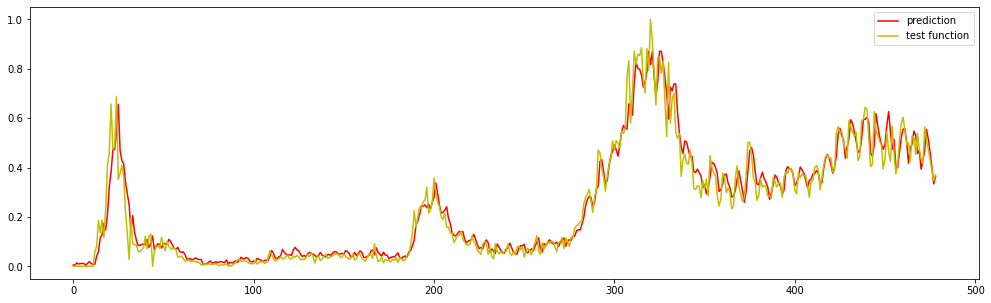

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model9_pred_all[:],'r',label="prediction")
plt.plot(kory[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
model9_pred_train = model9.predict(kortrainx)
len(model9_pred_train)

429

In [ ]:
for i in range(50):
  lst = []
  for j in range(7):
    lst.append([model9_pred_train[-7:].reshape(7)[j], korvac[422+i + j], kortem[422+i + j], korgon[422+i+j], red[422+i+j]])
  lst = np.array([lst])
  nxt = np.array([model9.predict(lst)[0]])
  model9_pred_train = np.concatenate((model9_pred_train, nxt))

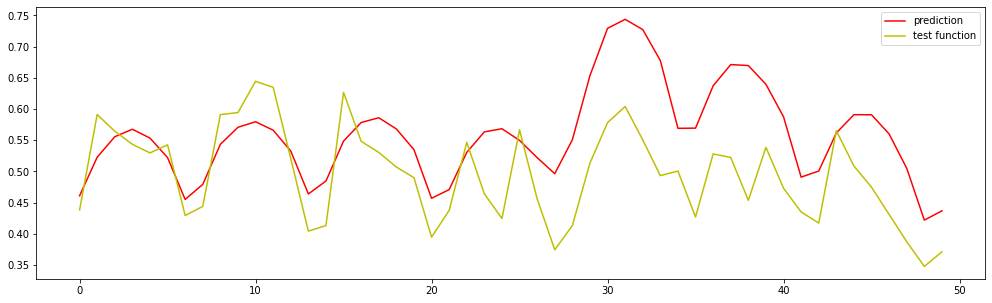

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model9_pred_train[429:479],'r',label="prediction")
plt.plot(kory[429:479], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
model10_pred_train = model10.predict(kortrainx)
len(model10_pred_train)

429

In [ ]:
for i in range(50):
  lst = []
  for j in range(7):
    lst.append([model10_pred_train[-7:].reshape(7)[j], korvac[422+i + j], kortem[422+i + j], korgon[422+i+j], red[422+i+j]])
  lst = np.array([lst])
  nxt = np.array([model10.predict(lst)[0]])
  model10_pred_train = np.concatenate((model10_pred_train, nxt))

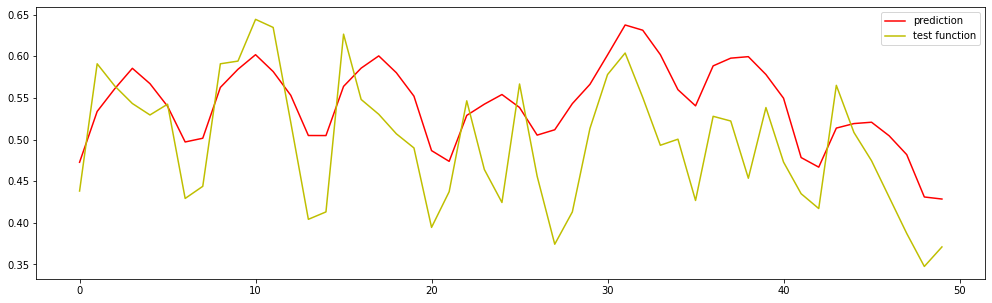

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model10_pred_train[429:479],'r',label="prediction")
plt.plot(kory[429:479], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
model9_1step_error=np.sum((kory[429:430]-model9_pred_train[429:430].T)**2)/1
print(model9_1step_error)

0.0005137808609930514


In [ ]:
model9_7step_error=np.sum((kory[429:436]-model9_pred_train[429:436].T)**2)/7
print(model9_7step_error)

0.0010704313315668182


In [ ]:
model9_14step_error=np.sum((kory[429:443]-model9_pred_train[429:443].T)**2)/14
print(model9_14step_error)

0.001727080525408198


In [ ]:
model9_50step_error=np.sum((kory[429:479]-model9_pred_train[429:479].T)**2)/50
print(model9_50step_error)

0.008920406032237569


In [ ]:
model10_7step_error=np.sum((kory[429:436]-model10_pred_train[429:436].T)**2)/7
print(model10_7step_error)

0.0017546715373267818


In [ ]:
model10_14step_error=np.sum((kory[429:443]-model10_pred_train[429:443].T)**2)/14
print(model10_14step_error)

0.0023077381463779607


In [ ]:
model10_50step_error=np.sum((kory[429:479]-model10_pred_train[429:479].T)**2)/14
print(model10_50step_error)

0.01740304241104478


In [ ]:
count = 0
for i in range(50):
  if abs(model10_pred_train[429 + i]-kory[429 + i]) > abs(kory[429 + i] - kory[429 + i - 1]):
    count += 1
print(count)

27


In [ ]:
count = 0
print(len(model9_pred_all))
for i in range(len(model9_pred_all)-1):
  if abs(model9_pred_all[i + 1] - kory[i + 1]) < abs(kory[i] - kory[i + 1]):
    count += 1
print(count)

479
227


In [ ]:
model9_pred_us = model9.predict(ustestx)
model9.reset_states()

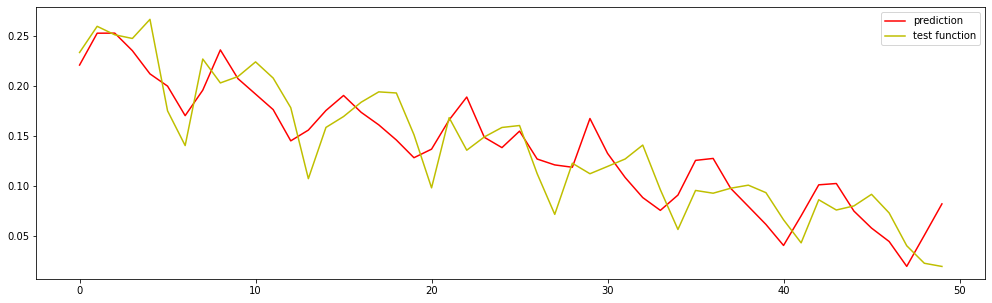

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model9_pred_us[:],'r',label="prediction")
plt.plot(ustesty[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
model9.evaluate(ustestx2,ustesty2)

6/6 [==============================] - 0s 3ms/step - loss: 0.0040


0.003951070364564657

In [ ]:
model9.evaluate(ustrainx2,ustrainy2)

10/10 [==============================] - 0s 2ms/step - loss: 8.1663e-04


0.0008166335755959153

In [ ]:
model5.evaluate(ustestx2, ustesty2)

6/6 [==============================] - 0s 3ms/step - loss: 0.0038


0.0037950510159134865

In [ ]:
model5.evaluate(ustrainx2, ustrainy2)

10/10 [==============================] - 0s 3ms/step - loss: 9.4780e-04


0.0009478027350269258

In [ ]:
model13 = Sequential()

model13.add(LSTM(6, input_shape=(ustrainx2.shape[1], ustrainx2.shape[2]), return_sequences = False))
model13.add(Dense(6))
#model2.add(Dense(4))
model13.add(Dense(1))
print(model13.summary())
model13.compile(loss='mean_squared_error', optimizer='adam')

hist13=model13.fit(ustrainx2, ustrainy2, epochs=300, batch_size=batch_size1, verbose=1, shuffle=False, callbacks=[es], validation_data = (ustestx2, ustesty2))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 6)                 288       
_________________________________________________________________
dense_23 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 7         
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
6/6 [==============================] - 2s 120ms/step - loss: 0.0344 - val_loss: 0.1453
Epoch 2/300
6/6 [==============================] - 0s 8ms/step - loss: 0.0187 - val_loss: 0.1205
Epoch 3/300
6/6 [==============================] - 0s 8ms/step - loss: 0.0105 - val_loss: 0.1027
Epoch 4/300
6/6 [==============================] - 0s 8ms/step - loss: 0.0073 - val_los

In [ ]:
model13.evaluate(ustestx2, ustesty2)

6/6 [==============================] - 0s 3ms/step - loss: 0.0093


0.009271890856325626

In [ ]:
model9.evaluate(ustestx2, ustesty2)

6/6 [==============================] - 0s 3ms/step - loss: 0.0040


0.003951070364564657

In [ ]:
koreapredict = pd.read_csv("/content/koreavaccine.csv")

In [ ]:
koreapredict

,date,red,korea,koreagon,koreacon,korvac,denmark,dengon,dencon,denvac,uk,ukgon,ukcon,ukvac,us,usgon,uscon,usvac,is,isgon,iscon,isvac,turkey,turgon,turcon,turvac,brazil,bragon,bracon,bravac,kenya,kengon,kencon,kenvac,hungary,hungon,huncon,hunvac,mexico,mexgon,mexcon,mexvac,ethiopia,ethgon,ethcon,ethvac,thailand,thagon,thacon,thavac
0,2020-02-01,1.0,20.3,0.0,1.0,0.0,39.6,0.0,0.0,0.0,44.2,0.0,0.0,0.0,51.5,0.0,0.0,0.0,58.6,0.0,0.0,0.0,29.2,0.0,0.0,0.0,77.0,0.0,0.0,0.0,68.0,0.0,0.0,0.0,30.8,0.0,0.0,0.0,60.0,0.0,0.0,0.0,63.7,0.0,0.0,0.0,76.5,0.0,0.0,0.0
1,2020-02-02,1.0,24.6,0.0,3.0,0.0,36.1,0.0,0.0,0.0,43.1,0.0,0.0,0.0,44.0,1.0,0.0,0.0,56.3,0.0,0.0,0.0,26.4,0.0,0.0,0.0,74.0,0.0,0.0,0.0,68.0,0.0,0.0,0.0,32.5,0.0,0.0,0.0,58.0,0.0,0.0,0.0,62.6,0.0,0.0,0.0,76.6,0.0,0.0,0.0
2,2020-02-03,0.0,26.4,0.0,0.0,0.0,34.4,0.0,0.0,0.0,50.0,0.0,6.0,0.0,50.5,0.0,3.0,0.0,56.4,0.0,0.0,0.0,29.6,0.0,0.0,0.0,75.0,0.0,0.0,0.0,66.0,0.0,0.0,0.0,35.1,0.0,0.0,0.0,60.0,1.0,0.0,0.0,66.8,0.0,0.0,0.0,75.9,0.0,0.0,0.0
3,2020-02-04,0.0,23.0,0.0,1.0,0.0,41.2,0.0,0.0,0.0,49.1,0.0,0.0,0.0,51.5,0.0,0.0,0.0,57.3,0.0,0.0,0.0,32.8,0.0,0.0,0.0,76.0,0.0,0.0,0.0,66.0,0.0,0.0,0.0,32.1,0.0,0.0,0.0,61.0,0.0,0.0,0.0,65.8,0.0,0.0,0.0,77.8,0.0,6.0,0.0
4,2020-02-05,0.0,24.6,0.0,3.0,0.0,40.4,0.0,0.0,0.0,52.6,0.0,1.0,0.0,37.5,0.0,0.0,0.0,56.6,0.0,0.0,0.0,28.1,0.0,0.0,0.0,78.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,39.7,0.0,0.0,0.0,58.0,1.0,0.0,0.0,71.8,0.0,0.0,0.0,77.9,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2022-05-28,1.0,68.8,0.0,NaN,38371336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
848,2022-05-29,1.0,71.6,0.0,NaN,38471336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
849,2022-05-30,0.0,66.1,0.0,NaN,38571336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
korpredred = np.array(koreapredict['red'][:850])
korpredtem = np.array(koreapredict['korea'][:850])
korpredgon = np.array(koreapredict['koreagon'][:850])
korpredvac = np.array(koreapredict['korvac'][:850])

In [ ]:
maxValue = np.max(korcon)
minValue = np.min(korcon)
korcon = (korcon - minValue) / (maxValue - minValue)

maxValue = np.max(korpredtem)
minValue = np.min(korpredtem)
korpredtem = (korpredtem - minValue) / (maxValue - minValue)

maxValue = 51269183
minValue = np.min(korpredvac)
korpredvac = (korpredvac - minValue) / (maxValue - minValue)

In [ ]:
for i in range(300):
  lst = []
  for j in range(7):
    lst.append([model9_pred_train[-7:].reshape(7)[j], korpredvac[422+i + j], korpredtem[422+i + j], korpredgon[422+i+j], korpredred[422+i+j]])
  lst = np.array([lst])
  nxt = np.array([model9.predict(lst)[0]])
  model9_pred_train = np.concatenate((model9_pred_train, nxt))

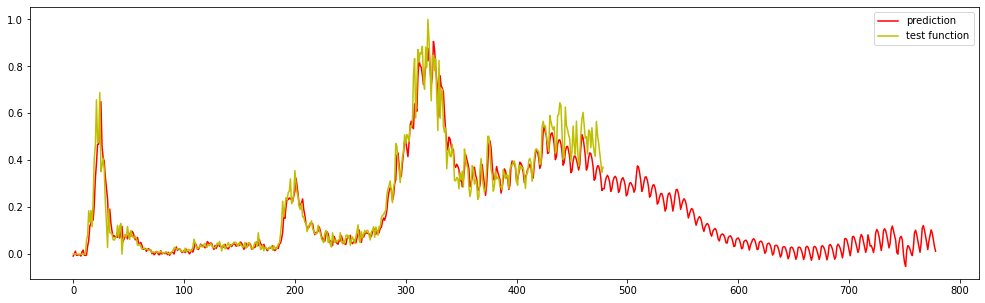

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model9_pred_train[:],'r',label="prediction")
plt.plot(kory[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
for i in range(300):
  lst = []
  for j in range(7):
    lst.append([model2_pred[-7:].reshape(7)[j], korpredvac[422+i + j], korpredtem[422+i + j], korpredgon[422+i+j], korpredred[422+i+j]])
  lst = np.array([lst])
  nxt = np.array([model2.predict(lst)[0]])
  model2_pred = np.concatenate((model2_pred, nxt))

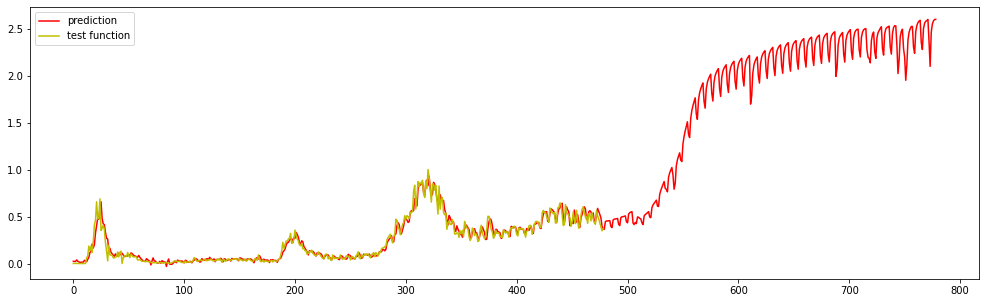

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model2_pred[:],'r',label="prediction")
plt.plot(kory[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
for i in range(300):
  lst = []
  for j in range(7):
    lst.append([model10_pred_train[-7:].reshape(7)[j], korpredvac[422+i + j], korpredtem[422+i + j], korpredgon[422+i+j], korpredred[422+i+j]])
  lst = np.array([lst])
  nxt = np.array([model10.predict(lst)[0]])
  model10_pred_train = np.concatenate((model10_pred_train, nxt))

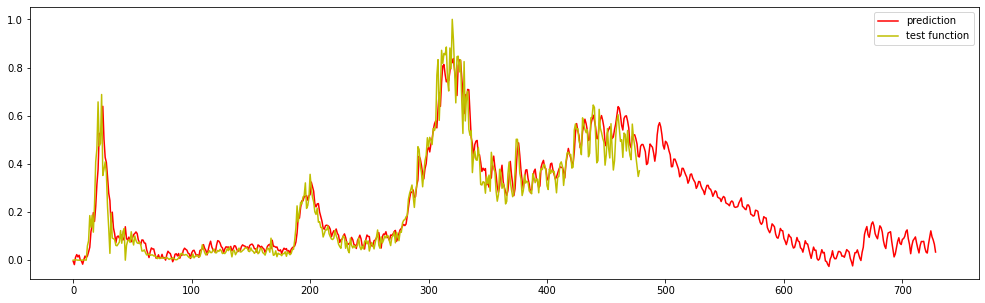

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model10_pred_train[:],'r',label="prediction")
plt.plot(kory[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
max(np.array(data['koreacon'][:]))

1237

In [ ]:
koreapredict['date'][486]

'2021-06-01'

In [ ]:
model9_pred_train[466:493] * 1237

array([[830.10474],
       [828.1424 ],
       [791.032  ],
       [726.5831 ],
       [607.0172 ],
       [619.12134],
       [694.5569 ],
       [730.83203],
       [730.5655 ],
       [692.5348 ],
       [624.4777 ],
       [521.84454],
       [540.2278 ],
       [609.08154],
       [638.9097 ],
       [637.557  ],
       [602.7048 ],
       [540.45795],
       [453.7899 ],
       [476.48233],
       [561.2076 ],
       [647.6139 ],
       [658.3845 ],
       [625.31573],
       [563.40704],
       [473.99655],
       [509.30313]], dtype=float32)

In [ ]:
for i in range(300):
  lst = []
  for j in range(7):
    lst.append([model5_pred[-7:].reshape(7)[j], korpredvac[422+i + j], korpredtem[422+i + j], korpredgon[422+i+j], korpredred[422+i+j]])
  lst = np.array([lst])
  nxt = np.array([model5.predict(lst)[0]])
  model5_pred = np.concatenate((model5_pred, nxt))

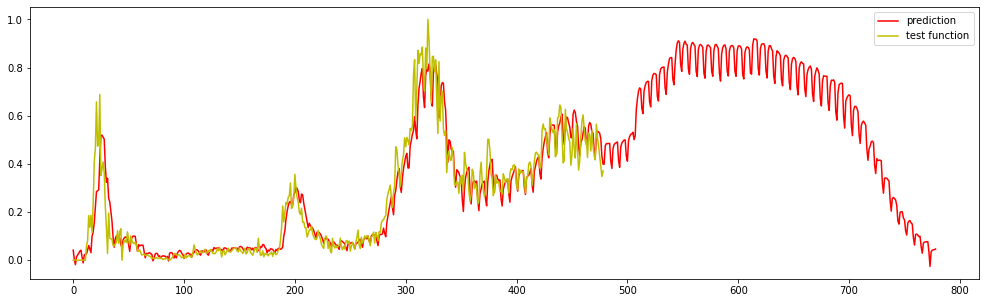

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model5_pred[:],'r',label="prediction")
plt.plot(kory[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
print('hello world')

hello world


In [ ]:
model2.evaluate(kortestx, kortesty)

2/2 [==============================] - 0s 8ms/step - loss: 0.0038


0.003849908011034131

In [ ]:
model3.evaluate(kortestx, kortesty)

2/2 [==============================] - 0s 6ms/step - loss: 0.0054


0.005391101818531752

In [ ]:
model4.evaluate(x_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.0049


0.004925747402012348

In [ ]:
model5.evaluate(kortestx, kortesty)

2/2 [==============================] - 0s 8ms/step - loss: 0.0048


0.0048363362438976765

In [ ]:
model9_pred_is = model9.predict(istestx)
model9.reset_states()

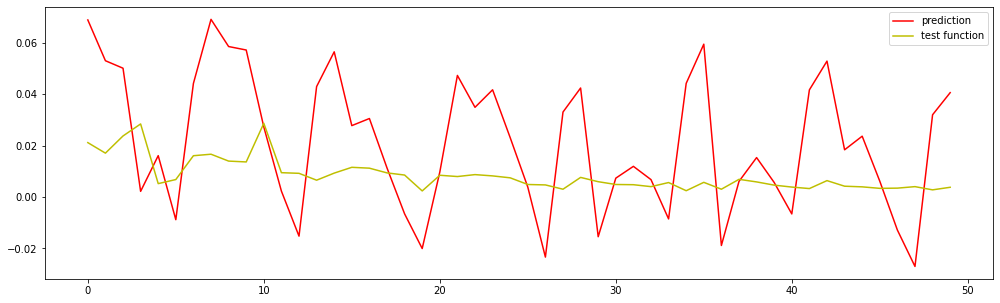

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model9_pred_is[:],'r',label="prediction")
plt.plot(istesty[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
model9.evaluate(istestx, istesty)

2/2 [==============================] - 0s 4ms/step - loss: 7.7180e-04


0.0007718016277067363

In [ ]:
model9_pred_us = model9.predict(ustestx)
model9.reset_states()

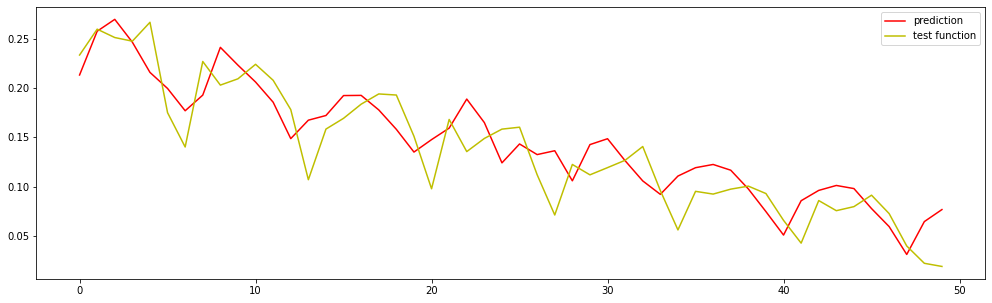

In [ ]:
plt.figure(figsize=(17,5))
plt.plot(model9_pred_us[:],'r',label="prediction")
plt.plot(ustesty[:], 'y', label="test function")
plt.legend()
plt.show()

In [ ]:
model9.evaluate(ustestx, ustesty)

2/2 [==============================] - 0s 5ms/step - loss: 8.9595e-04


0.0008959526312537491